In [12]:
!python -m pip install keras

In [0]:
from keras import Input
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.datasets import cifar10

In [0]:
batch_size = 32
epochs = 50
model_name = 'branched_cifar.h5'

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
from keras.utils import to_categorical

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [0]:
from keras.layers import concatenate

input_tensor = Input(shape = (32, 32, 3))

branch_a = Conv2D(32, (3, 3), activation = 'relu')(input_tensor)
branch_a1 = Conv2D(32, (3, 3), activation = 'relu')(branch_a)
branch_a2 = Conv2D(32, (3, 3), activation = 'relu')(branch_a1)
branch_a3 = MaxPooling2D((2, 2))(branch_a2)
branch_a4 = Dropout(0.2)(branch_a3)

branch_b = Conv2D(32, (3, 3), activation = 'relu')(input_tensor)
branch_b1 = Conv2D(32, (3, 3), activation = 'relu')(branch_b)
branch_b2 = Conv2D(32, (3, 3), activation = 'relu')(branch_b1)
branch_b3 = MaxPooling2D((2, 2))(branch_b2)
branch_b4 = Dropout(0.2)(branch_b3)

merged = concatenate([branch_b4, branch_a4], axis = -1)
merged = Flatten()(merged)
merged = Dense(512, activation = 'relu')(merged)
merged = Dropout(0.5)(merged)
output = Dense(10, activation = 'softmax')(merged)

In [26]:
from keras.models import Model

model = Model(input_tensor, output)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_242 (Conv2D)             (None, 30, 30, 32)   896         input_11[0][0]                   
__________________________________________________________________________________________________
conv2d_239 (Conv2D)             (None, 30, 30, 32)   896         input_11[0][0]                   
__________________________________________________________________________________________________
conv2d_243 (Conv2D)             (None, 28, 28, 32)   9248        conv2d_242[0][0]                 
__________________________________________________________________________________________________
conv2d_240

In [0]:
from keras.optimizers import rmsprop

opt = rmsprop(lr = 0.0001, decay = 1e-6)

model.compile(loss = 'categorical_crossentropy',
             optimizer = opt,
             metrics = ['accuracy'])

In [28]:
history = model.fit(x_train, y_train,
                   epochs = epochs,
                   validation_data = (x_test, y_test),
                   shuffle = True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
21888/50000 [============>.................] - ETA: 5:04 - loss: 1.8202 - acc: 0.3450

50000/50000 [==============================] - 566s 11ms/step - loss: 1.6518 - acc: 0.4053 - val_loss: 1.4243 - val_acc: 0.4877
Epoch 2/50
 3584/50000 [=>............................] - ETA: 8:24 - loss: 1.4325 - acc: 0.4813

49984/50000 [============================>.] - ETA: 0s - loss: 1.3398 - acc: 0.5239

50000/50000 [==============================] - 563s 11ms/step - loss: 1.3399 - acc: 0.5239 - val_loss: 1.2822 - val_acc: 0.5448
Epoch 3/50
10336/50000 [=====>........................] - ETA: 7:04 - loss: 1.2538 - acc: 0.5591

49984/50000 [============================>.] - ETA: 0s - loss: 1.2102 - acc: 0.5748

50000/50000 [==============================] - 559s 11ms/step - loss: 1.2102 - acc: 0.5748 - val_loss: 1.1346 - val_acc: 0.6051
Epoch 4/50
10336/50000 [=====>........................] - ETA: 7:04 - loss: 1.1296 - acc: 0.6026

49984/50000 [============================>.] - ETA: 0s - loss: 1.1259 - acc: 0.6038

50000/50000 [==============================] - 567s 11ms/step - loss: 1.1260 - acc: 0.6037 - val_loss: 1.0776 - val_acc: 0.6241
Epoch 5/50
10336/50000 [=====>........................] - ETA: 7:05 - loss: 1.0839 - acc: 0.6220

49984/50000 [============================>.] - ETA: 0s - loss: 1.0801 - acc: 0.6264

50000/50000 [==============================] - 567s 11ms/step - loss: 1.0801 - acc: 0.6263 - val_loss: 1.0258 - val_acc: 0.6452
Epoch 6/50
10336/50000 [=====>........................] - ETA: 7:14 - loss: 1.0383 - acc: 0.6462

49984/50000 [============================>.] - ETA: 0s - loss: 1.0451 - acc: 0.6407

50000/50000 [==============================] - 569s 11ms/step - loss: 1.0451 - acc: 0.6407 - val_loss: 1.0163 - val_acc: 0.6482
Epoch 7/50
10336/50000 [=====>........................] - ETA: 7:10 - loss: 1.0123 - acc: 0.6533

49984/50000 [============================>.] - ETA: 0s - loss: 1.0292 - acc: 0.6478

50000/50000 [==============================] - 565s 11ms/step - loss: 1.0292 - acc: 0.6478 - val_loss: 1.0422 - val_acc: 0.6474
Epoch 8/50
10336/50000 [=====>........................] - ETA: 7:08 - loss: 1.0193 - acc: 0.6548

49984/50000 [============================>.] - ETA: 0s - loss: 1.0197 - acc: 0.6536

50000/50000 [==============================] - 565s 11ms/step - loss: 1.0198 - acc: 0.6536 - val_loss: 1.1373 - val_acc: 0.6117
Epoch 9/50
10336/50000 [=====>........................] - ETA: 7:08 - loss: 1.0037 - acc: 0.6571

49984/50000 [============================>.] - ETA: 0s - loss: 1.0142 - acc: 0.6572

50000/50000 [==============================] - 563s 11ms/step - loss: 1.0141 - acc: 0.6573 - val_loss: 1.0538 - val_acc: 0.6513
Epoch 10/50
10304/50000 [=====>........................] - ETA: 7:10 - loss: 1.0120 - acc: 0.6620

49984/50000 [============================>.] - ETA: 0s - loss: 1.0187 - acc: 0.6561

50000/50000 [==============================] - 572s 11ms/step - loss: 1.0187 - acc: 0.6561 - val_loss: 1.0390 - val_acc: 0.6515
Epoch 11/50
10304/50000 [=====>........................] - ETA: 7:14 - loss: 1.0045 - acc: 0.6641

49984/50000 [============================>.] - ETA: 0s - loss: 1.0252 - acc: 0.6582

50000/50000 [==============================] - 569s 11ms/step - loss: 1.0253 - acc: 0.6582 - val_loss: 1.0748 - val_acc: 0.6390
Epoch 12/50
10304/50000 [=====>........................] - ETA: 7:11 - loss: 1.0101 - acc: 0.6618

49984/50000 [============================>.] - ETA: 0s - loss: 1.0220 - acc: 0.6574

50000/50000 [==============================] - 567s 11ms/step - loss: 1.0221 - acc: 0.6574 - val_loss: 1.1808 - val_acc: 0.6397
Epoch 13/50
10304/50000 [=====>........................] - ETA: 7:10 - loss: 1.0076 - acc: 0.6644

49984/50000 [============================>.] - ETA: 0s - loss: 1.0276 - acc: 0.6578

50000/50000 [==============================] - 564s 11ms/step - loss: 1.0274 - acc: 0.6579 - val_loss: 1.2379 - val_acc: 0.6128
Epoch 14/50
10304/50000 [=====>........................] - ETA: 7:12 - loss: 1.0304 - acc: 0.6586

49984/50000 [============================>.] - ETA: 0s - loss: 1.0228 - acc: 0.6593

50000/50000 [==============================] - 569s 11ms/step - loss: 1.0227 - acc: 0.6593 - val_loss: 1.0085 - val_acc: 0.6602
Epoch 15/50
10304/50000 [=====>........................] - ETA: 7:06 - loss: 1.0256 - acc: 0.6636

49984/50000 [============================>.] - ETA: 0s - loss: 1.0255 - acc: 0.6581

50000/50000 [==============================] - 562s 11ms/step - loss: 1.0255 - acc: 0.6581 - val_loss: 1.1414 - val_acc: 0.6183
Epoch 16/50
10304/50000 [=====>........................] - ETA: 7:11 - loss: 1.0138 - acc: 0.6601

49984/50000 [============================>.] - ETA: 0s - loss: 1.0271 - acc: 0.6585

50000/50000 [==============================] - 566s 11ms/step - loss: 1.0274 - acc: 0.6584 - val_loss: 1.1493 - val_acc: 0.6150
Epoch 17/50
10304/50000 [=====>........................] - ETA: 7:09 - loss: 1.0352 - acc: 0.6573

49984/50000 [============================>.] - ETA: 0s - loss: 1.0377 - acc: 0.6539

50000/50000 [==============================] - 565s 11ms/step - loss: 1.0375 - acc: 0.6540 - val_loss: 1.0739 - val_acc: 0.6575
Epoch 18/50
10304/50000 [=====>........................] - ETA: 7:07 - loss: 1.0139 - acc: 0.6582

49984/50000 [============================>.] - ETA: 0s - loss: 1.0416 - acc: 0.6547

50000/50000 [==============================] - 565s 11ms/step - loss: 1.0415 - acc: 0.6547 - val_loss: 1.0955 - val_acc: 0.6406
Epoch 19/50
10304/50000 [=====>........................] - ETA: 7:14 - loss: 1.0128 - acc: 0.6602

49984/50000 [============================>.] - ETA: 0s - loss: 1.0540 - acc: 0.6525

50000/50000 [==============================] - 570s 11ms/step - loss: 1.0540 - acc: 0.6525 - val_loss: 1.1058 - val_acc: 0.6502
Epoch 20/50
10304/50000 [=====>........................] - ETA: 7:07 - loss: 1.0577 - acc: 0.6614

49984/50000 [============================>.] - ETA: 0s - loss: 1.0645 - acc: 0.6521

50000/50000 [==============================] - 567s 11ms/step - loss: 1.0644 - acc: 0.6521 - val_loss: 1.5476 - val_acc: 0.6353
Epoch 21/50
10304/50000 [=====>........................] - ETA: 7:12 - loss: 1.0567 - acc: 0.6542

49984/50000 [============================>.] - ETA: 0s - loss: 1.0764 - acc: 0.6468

50000/50000 [==============================] - 569s 11ms/step - loss: 1.0764 - acc: 0.6468 - val_loss: 1.0818 - val_acc: 0.6439
Epoch 22/50
10304/50000 [=====>........................] - ETA: 7:08 - loss: 1.0790 - acc: 0.6452

49984/50000 [============================>.] - ETA: 0s - loss: 1.0907 - acc: 0.6448

50000/50000 [==============================] - 565s 11ms/step - loss: 1.0907 - acc: 0.6449 - val_loss: 1.1247 - val_acc: 0.6254
Epoch 23/50
10304/50000 [=====>........................] - ETA: 7:01 - loss: 1.0831 - acc: 0.6461

49984/50000 [============================>.] - ETA: 0s - loss: 1.1065 - acc: 0.6417

50000/50000 [==============================] - 554s 11ms/step - loss: 1.1067 - acc: 0.6417 - val_loss: 1.2059 - val_acc: 0.6180
Epoch 24/50
10304/50000 [=====>........................] - ETA: 6:59 - loss: 1.1303 - acc: 0.6386

49984/50000 [============================>.] - ETA: 0s - loss: 1.1208 - acc: 0.6357

50000/50000 [==============================] - 553s 11ms/step - loss: 1.1212 - acc: 0.6358 - val_loss: 1.1984 - val_acc: 0.6045
Epoch 25/50
10304/50000 [=====>........................] - ETA: 6:59 - loss: 1.1247 - acc: 0.6386

49984/50000 [============================>.] - ETA: 0s - loss: 1.1396 - acc: 0.6318

50000/50000 [==============================] - 552s 11ms/step - loss: 1.1395 - acc: 0.6318 - val_loss: 1.1036 - val_acc: 0.6359
Epoch 26/50
10304/50000 [=====>........................] - ETA: 6:58 - loss: 1.1466 - acc: 0.6331

49984/50000 [============================>.] - ETA: 0s - loss: 1.1454 - acc: 0.6302

50000/50000 [==============================] - 553s 11ms/step - loss: 1.1454 - acc: 0.6302 - val_loss: 1.3945 - val_acc: 0.6114
Epoch 27/50
10304/50000 [=====>........................] - ETA: 6:59 - loss: 1.1550 - acc: 0.6191

49984/50000 [============================>.] - ETA: 0s - loss: 1.1605 - acc: 0.6204

50000/50000 [==============================] - 553s 11ms/step - loss: 1.1605 - acc: 0.6204 - val_loss: 1.1096 - val_acc: 0.6521
Epoch 28/50
10304/50000 [=====>........................] - ETA: 6:59 - loss: 1.1717 - acc: 0.6201

49984/50000 [============================>.] - ETA: 0s - loss: 1.1837 - acc: 0.6174

50000/50000 [==============================] - 553s 11ms/step - loss: 1.1838 - acc: 0.6173 - val_loss: 1.1211 - val_acc: 0.6436
Epoch 29/50
10304/50000 [=====>........................] - ETA: 6:59 - loss: 1.1940 - acc: 0.6079

49984/50000 [============================>.] - ETA: 0s - loss: 1.2035 - acc: 0.6087

50000/50000 [==============================] - 553s 11ms/step - loss: 1.2034 - acc: 0.6088 - val_loss: 1.1844 - val_acc: 0.6421
Epoch 30/50
10304/50000 [=====>........................] - ETA: 7:00 - loss: 1.1922 - acc: 0.6126

49984/50000 [============================>.] - ETA: 0s - loss: 1.2189 - acc: 0.6069

50000/50000 [==============================] - 554s 11ms/step - loss: 1.2190 - acc: 0.6068 - val_loss: 1.2161 - val_acc: 0.6050
Epoch 31/50
10304/50000 [=====>........................] - ETA: 7:01 - loss: 1.2135 - acc: 0.6073

49984/50000 [============================>.] - ETA: 0s - loss: 1.2284 - acc: 0.6043

50000/50000 [==============================] - 556s 11ms/step - loss: 1.2283 - acc: 0.6043 - val_loss: 1.1441 - val_acc: 0.6325
Epoch 32/50
10304/50000 [=====>........................] - ETA: 7:00 - loss: 1.2430 - acc: 0.5970

49984/50000 [============================>.] - ETA: 0s - loss: 1.2452 - acc: 0.5976

50000/50000 [==============================] - 555s 11ms/step - loss: 1.2453 - acc: 0.5975 - val_loss: 1.3224 - val_acc: 0.5681
Epoch 33/50
10304/50000 [=====>........................] - ETA: 7:02 - loss: 1.2547 - acc: 0.5956

49984/50000 [============================>.] - ETA: 0s - loss: 1.2506 - acc: 0.5931

50000/50000 [==============================] - 558s 11ms/step - loss: 1.2507 - acc: 0.5930 - val_loss: 1.3203 - val_acc: 0.6199
Epoch 34/50
10304/50000 [=====>........................] - ETA: 7:01 - loss: 1.2716 - acc: 0.5926

49984/50000 [============================>.] - ETA: 0s - loss: 1.2731 - acc: 0.5888

50000/50000 [==============================] - 556s 11ms/step - loss: 1.2732 - acc: 0.5888 - val_loss: 1.3498 - val_acc: 0.5700
Epoch 35/50
10304/50000 [=====>........................] - ETA: 7:02 - loss: 1.2789 - acc: 0.5887

49984/50000 [============================>.] - ETA: 0s - loss: 1.2822 - acc: 0.5866

50000/50000 [==============================] - 556s 11ms/step - loss: 1.2824 - acc: 0.5867 - val_loss: 1.3634 - val_acc: 0.5444
Epoch 36/50
10304/50000 [=====>........................] - ETA: 7:00 - loss: 1.2907 - acc: 0.5798

49984/50000 [============================>.] - ETA: 0s - loss: 1.3105 - acc: 0.5769

50000/50000 [==============================] - 554s 11ms/step - loss: 1.3106 - acc: 0.5769 - val_loss: 1.2764 - val_acc: 0.6082
Epoch 37/50
10304/50000 [=====>........................] - ETA: 6:58 - loss: 1.3001 - acc: 0.5798

49984/50000 [============================>.] - ETA: 0s - loss: 1.3226 - acc: 0.5754

50000/50000 [==============================] - 554s 11ms/step - loss: 1.3225 - acc: 0.5754 - val_loss: 1.3025 - val_acc: 0.5941
Epoch 38/50
10304/50000 [=====>........................] - ETA: 7:02 - loss: 1.3110 - acc: 0.5712

49984/50000 [============================>.] - ETA: 0s - loss: 1.3334 - acc: 0.5669

50000/50000 [==============================] - 557s 11ms/step - loss: 1.3335 - acc: 0.5669 - val_loss: 1.2288 - val_acc: 0.6097
Epoch 39/50
10304/50000 [=====>........................] - ETA: 7:03 - loss: 1.3383 - acc: 0.5716

49984/50000 [============================>.] - ETA: 0s - loss: 1.3600 - acc: 0.5662

50000/50000 [==============================] - 558s 11ms/step - loss: 1.3603 - acc: 0.5661 - val_loss: 1.1992 - val_acc: 0.5995
Epoch 40/50
10304/50000 [=====>........................] - ETA: 7:01 - loss: 1.3634 - acc: 0.5607

49984/50000 [============================>.] - ETA: 0s - loss: 1.3786 - acc: 0.5570

50000/50000 [==============================] - 554s 11ms/step - loss: 1.3786 - acc: 0.5570 - val_loss: 1.2257 - val_acc: 0.5979
Epoch 41/50
10304/50000 [=====>........................] - ETA: 6:59 - loss: 1.3747 - acc: 0.5635

49984/50000 [============================>.] - ETA: 0s - loss: 1.3831 - acc: 0.5550

50000/50000 [==============================] - 554s 11ms/step - loss: 1.3831 - acc: 0.5550 - val_loss: 1.3673 - val_acc: 0.5388
Epoch 42/50
10304/50000 [=====>........................] - ETA: 6:59 - loss: 1.3831 - acc: 0.5559

49984/50000 [============================>.] - ETA: 0s - loss: 1.3972 - acc: 0.5500

50000/50000 [==============================] - 554s 11ms/step - loss: 1.3975 - acc: 0.5499 - val_loss: 1.3021 - val_acc: 0.5770
Epoch 43/50
10304/50000 [=====>........................] - ETA: 7:00 - loss: 1.3959 - acc: 0.5543

49984/50000 [============================>.] - ETA: 0s - loss: 1.4247 - acc: 0.5437

50000/50000 [==============================] - 555s 11ms/step - loss: 1.4247 - acc: 0.5437 - val_loss: 1.6562 - val_acc: 0.5776
Epoch 44/50
10304/50000 [=====>........................] - ETA: 7:01 - loss: 1.4001 - acc: 0.5598

49984/50000 [============================>.] - ETA: 0s - loss: 1.4315 - acc: 0.5440

50000/50000 [==============================] - 555s 11ms/step - loss: 1.4317 - acc: 0.5439 - val_loss: 1.5391 - val_acc: 0.5677
Epoch 45/50
10304/50000 [=====>........................] - ETA: 7:01 - loss: 1.4382 - acc: 0.5459

49984/50000 [============================>.] - ETA: 0s - loss: 1.4514 - acc: 0.5372

50000/50000 [==============================] - 554s 11ms/step - loss: 1.4514 - acc: 0.5371 - val_loss: 1.3551 - val_acc: 0.5572
Epoch 46/50
10304/50000 [=====>........................] - ETA: 6:59 - loss: 1.4672 - acc: 0.5366

49984/50000 [============================>.] - ETA: 0s - loss: 1.4720 - acc: 0.5307

50000/50000 [==============================] - 553s 11ms/step - loss: 1.4719 - acc: 0.5308 - val_loss: 1.3419 - val_acc: 0.6062
Epoch 47/50
10304/50000 [=====>........................] - ETA: 6:59 - loss: 1.4711 - acc: 0.5312

49984/50000 [============================>.] - ETA: 0s - loss: 1.4755 - acc: 0.5298

50000/50000 [==============================] - 554s 11ms/step - loss: 1.4755 - acc: 0.5298 - val_loss: 1.3373 - val_acc: 0.5677
Epoch 48/50
10304/50000 [=====>........................] - ETA: 7:01 - loss: 1.4814 - acc: 0.5315

49984/50000 [============================>.] - ETA: 0s - loss: 1.5008 - acc: 0.5226

50000/50000 [==============================] - 554s 11ms/step - loss: 1.5007 - acc: 0.5227 - val_loss: 1.2669 - val_acc: 0.5923
Epoch 49/50
10304/50000 [=====>........................] - ETA: 7:00 - loss: 1.4947 - acc: 0.5204

49984/50000 [============================>.] - ETA: 0s - loss: 1.5141 - acc: 0.5152

50000/50000 [==============================] - 557s 11ms/step - loss: 1.5141 - acc: 0.5152 - val_loss: 1.4241 - val_acc: 0.5319
Epoch 50/50
10304/50000 [=====>........................] - ETA: 7:03 - loss: 1.5170 - acc: 0.5138

49984/50000 [============================>.] - ETA: 0s - loss: 1.5291 - acc: 0.5128

50000/50000 [==============================] - 559s 11ms/step - loss: 1.5290 - acc: 0.5128 - val_loss: 2.9345 - val_acc: 0.5208


In [0]:
model.save(model_name)
from google.colab import files

files.download(model_name)

In [0]:
acc = history.history['acc']
loss = history.history['loss']

val_loss = history.history['val_loss']
val_acc = history.history['val_acc']

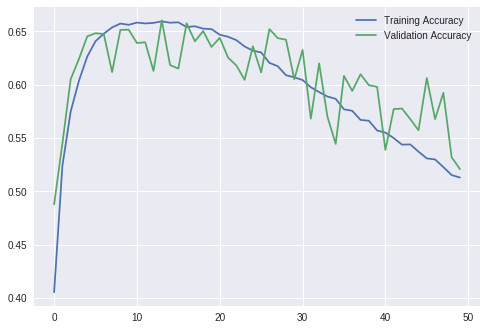

In [42]:
import matplotlib.pyplot as plt

plt.plot(acc, label = 'Training Accuracy')
plt.plot(val_acc, label = 'Validation Accuracy')
plt.legend()
plt.show()

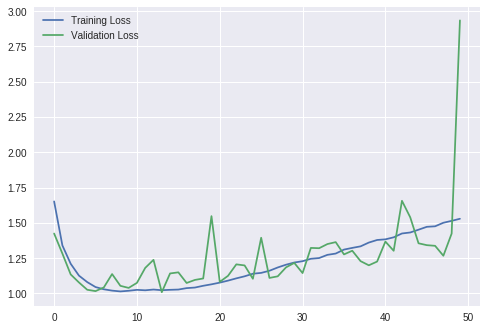

In [43]:
plt.plot(loss, label = 'Training Loss')
plt.plot(val_loss, label = 'Validation Loss')
plt.legend()
plt.show()